# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [4]:
# Import the data
lending_data = pd.read_csv("Resources/lending_data.csv")
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [6]:
#check the null count and data types
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

# Prediction
In this Predictive model analysis, my prediction is Logistic regression will do better than a Random Forests classifier. Since we have data and qualifiers which can provide enough indicators for this model.

## Split the Data into Training and Testing Sets

In [18]:
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
y = lending_data['loan_status'].values
X = lending_data.drop('loan_status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [14]:
#scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

##Logistic Regression Model helps predicting a binary outcomes like 'Yes' or 'No' values based on observations in the selected dataset. In this project we are looking to predict the lender to approve or decline the loan based on the application requirements.

In [16]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [19]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [20]:
# Train a Logistic Regression model and print the model score
print(f"Train Data Score: {classifier.score(X_train, y_train)}")
print(f"Test Data Score: {classifier.score(X_test, y_test)}")

Train Data Score: 0.9916597881414225
Test Data Score: 0.9923648369789517


In [21]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18656,    85],
       [   63,   580]], dtype=int64)

In [22]:
#Determine accuracy
tp,tn,fp,fn = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn) 
# (18656 + 580) / (18656 + 580 + 63 + 85)
print(f"Accuracy: {accuracy}")

Accuracy: 0.966828312009905


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18741
           1       0.87      0.90      0.89       643

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



# Random Forest classifier
random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


In [25]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
classifier = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Train Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Test Score: {classifier.score(X_test_scaled, y_test)}')

Train Score: 0.9974893382858715
Test Score: 0.9908171687990095


In [32]:
from matplotlib import pyplot as plt

[1.34686541e-01 2.35103115e-01 1.79984803e-01 1.63830590e-01
 1.34594557e-01 1.32680633e-04 1.51667713e-01]


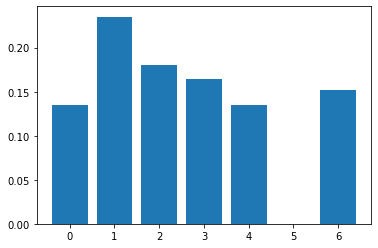

In [33]:
features = classifier.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [35]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(classifier)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

# Fit Logistic regression model and Random forest classifier model

In [40]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

c:\Users\trish\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [41]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Train Score: {clf.score(X_train_scaled, y_train)}')
print(f'Test Score: {clf.score(X_test_scaled, y_test)}')

Train Score: 0.9676537350392076
Test Score: 0.9680664465538589


# Analysis
 As it can be seen that both models testing score have not significantly different. The LRM has a testing score of 0.9923 while the RFM's testing score is 0.9908. My prediction seems not so accurate.However, if considering the training score, the one displayed with the Random forest model is higher than the one detected with the Logistic regression model. Overall, either of the models can do the analysis with appropriate accuracy.


*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*